## Rates of Return

### Import key libraries, classes and functions

In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
PG = wb.DataReader('PLUG', data_source='yahoo',start='2019-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1.35,1.23,1.24,1.33,3389200,1.33
2019-01-03,1.33,1.24,1.33,1.26,3638000,1.26
2019-01-04,1.35,1.26,1.30,1.34,4863800,1.34
2019-01-07,1.59,1.38,1.38,1.53,7525700,1.53
2019-01-08,1.70,1.59,1.60,1.60,8715600,1.60


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-18,54.480000,50.060001,51.880001,50.230000,34057500,50.230000
2021-02-19,57.779999,52.599998,53.189999,55.889999,34660200,55.889999
2021-02-22,54.450001,48.009998,54.209999,48.599998,34709800,48.599998
2021-02-23,47.139999,37.220001,44.820000,46.580002,48728700,46.580002
2021-02-24,48.840000,46.270000,48.110001,47.270100,10549210,47.270100


### Simple Rate of Return

In [5]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1


<AxesSubplot:xlabel='Date'>

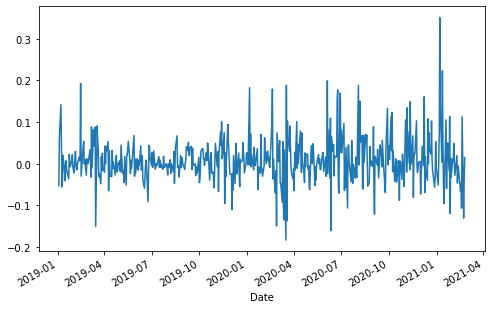

In [6]:
PG['simple_return'].plot(figsize=(8,5))

In [7]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.008086505854876467

In [8]:
avg_returns_a = PG['simple_return'].mean()*250
avg_returns_a

2.021626463719117

In [9]:
str(round(avg_returns_a, 5) * 100) + ' %'

'202.163 %'

### Log Returns

In [10]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2019-01-02,1.35,1.23,1.24,1.33,3389200,1.33,NaN
2019-01-03,1.33,1.24,1.33,1.26,3638000,1.26,-0.052632
2019-01-04,1.35,1.26,1.30,1.34,4863800,1.34,0.063492
2019-01-07,1.59,1.38,1.38,1.53,7525700,1.53,0.141791
2019-01-08,1.70,1.59,1.60,1.60,8715600,1.60,0.045752


In [11]:
PG['log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))

<AxesSubplot:xlabel='Date'>

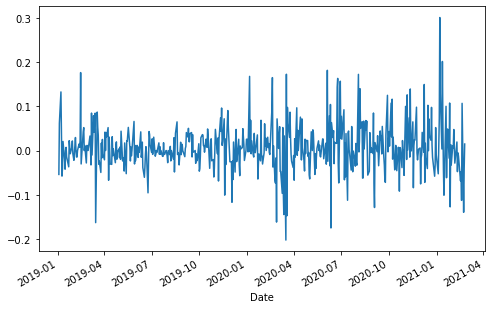

In [13]:
PG['log_return'].plot(figsize=(8, 5))

In [14]:
log_return_d =  PG['log_return'].mean()
log_return_d

0.006612405515167875

In [15]:
log_return_a = PG['log_return'].mean()*250
log_return_a

1.6531013787919688

In [19]:
print(str(round(log_return_a*100,5)) + ' %')

165.31014 %


### Portfolio returns

In [21]:
import pandas as pd

In [22]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2018-1-1')['Adj Close']

In [24]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2018-01-02 to 2021-02-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      792 non-null    float64
 1   MSFT    792 non-null    float64
 2   F       792 non-null    float64
 3   GE      792 non-null    float64
dtypes: float64(4)
memory usage: 30.9 KB


In [25]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2018-01-02,82.617447,82.194328,10.890413,16.660337
2018-01-03,82.517197,82.576843,10.976439,16.817858
2018-01-04,83.100464,83.303658,11.165686,17.169968
2018-01-05,83.155174,84.336464,11.354935,17.179234
2018-01-08,83.592636,84.422516,11.311922,16.938316


### Normalisation to 100

In [26]:
mydata.iloc[0]

PG      82.617447
MSFT    82.194328
F       10.890413
GE      16.660337
Name: 2018-01-02 00:00:00, dtype: float64

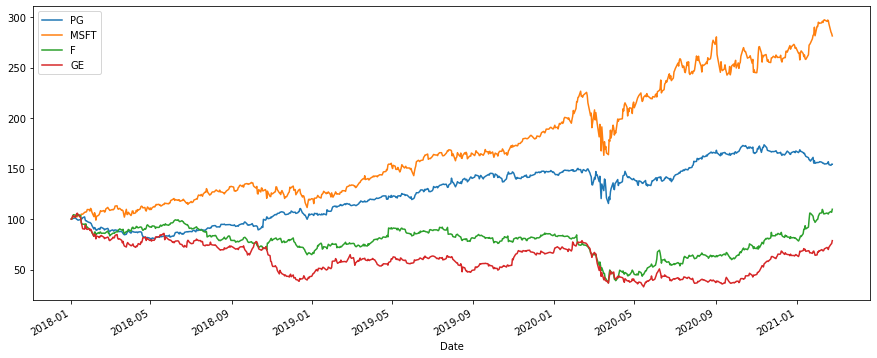

In [31]:
(mydata / mydata.iloc[0] *100).plot(figsize = (15, 6))
plt.show()

<AxesSubplot:xlabel='Date'>

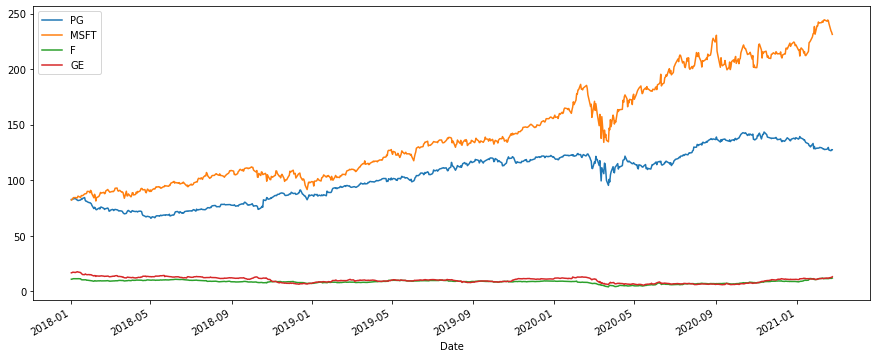

In [30]:
mydata.plot(figsize = (15, 6))

### Calculating the Return of a Portfolio of Securities

In [34]:
returns = (mydata / mydata.shift(1)) -1
returns[1:].head()

,PG,MSFT,F,GE
Date,,,,
2018-01-03,-0.001213,0.004654,0.007899,0.009455
2018-01-04,0.007068,0.008802,0.017241,0.020937
2018-01-05,0.000658,0.012398,0.016949,0.000540
2018-01-08,0.005261,0.001020,-0.003788,-0.014024
2018-01-09,-0.007305,-0.000679,-0.005323,0.015317


In [35]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [37]:
plt.show(np.dot(returns, weights)

SyntaxError: unexpected EOF while parsing (<ipython-input-37-ea1c10f6a4bd>, line 1)

In [38]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.164366
MSFT    0.377788
F       0.106374
GE      0.041202
dtype: float64

In [39]:
np.dot(annual_returns, weights)

0.17243271563564042

In [43]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5)*100)
pfolio_1

'17.243'

In [44]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [45]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),5)*100)
pfolio_2

'23.488'

### Returns for Index

In [53]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']
ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2018-1-1')['Adj Close']

In [56]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2018-01-02,2695.810059,7006.899902,12871.389648
2018-01-03,2713.060059,7065.529785,12978.209961
2018-01-04,2723.989990,7077.910156,13167.889648
2018-01-05,2743.149902,7136.560059,13319.639648
2018-01-08,2747.709961,7157.390137,13367.780273


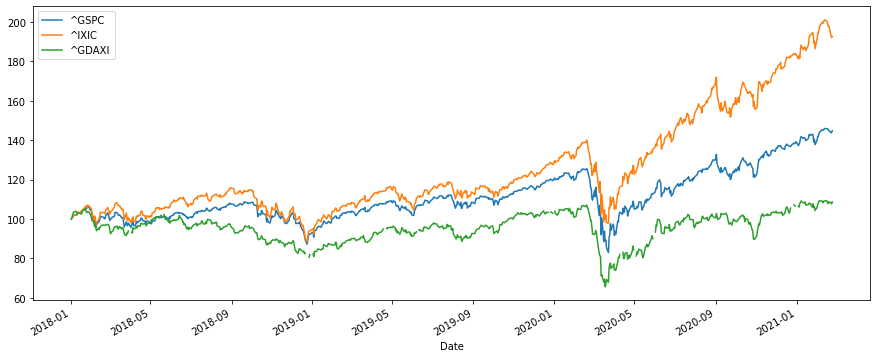

In [58]:
(ind_data / ind_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [59]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

In [60]:
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-02-18,-0.004416,-0.007170,-0.001606
2021-02-19,-0.001855,0.000656,0.007655
2021-02-22,-0.007733,-0.024607,-0.003087
2021-02-23,0.001256,-0.005014,-0.006110
2021-02-24,0.006075,0.002871,0.008995


In [61]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.143556
^IXIC     0.239153
^GDAXI    0.037447
dtype: float64